In [113]:
import pandas as pd

In [114]:
df= pd.read_csv("C://Users//akhil//Desktop//HAP 880//Week 1//highUtilizationPredictionV2wco.csv")

In [115]:
df.head()

,race,age,patient_id,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,ELIX7,...,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12,HighUtilizationY2,claimCount
0,B,71,PAT136597,0,0,0,0,0,1,0,...,0,1,4,2,1,3,1,1,1,160
1,A,86,PAT119838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2,W,70,PAT11289,1,0,0,0,0,0,0,...,4,2,2,0,6,2,1,0,0,52
3,W,75,PAT178745,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,15
4,W,77,PAT50922,0,0,0,0,1,0,0,...,4,3,4,4,4,3,4,4,0,66


In [116]:
cls = df.columns.tolist()

In [117]:
cls.remove('race')
cls.remove('patient_id')
cls.remove('HighUtilizationY2')
cls.remove('claimCount')

In [118]:
df1 = df[cls]
label = df.HighUtilizationY2

In [119]:
df1.head()

,age,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,ELIX7,ELIX8,ELIX9,...,drugs_m2-3,drugs_m3-4,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12
0,71,0,0,0,0,0,1,0,1,1,...,3,3,0,1,4,2,1,3,1,1
1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70,1,0,0,0,0,0,0,0,1,...,1,3,4,2,2,0,6,2,1,0
3,75,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77,0,0,0,0,1,0,0,1,1,...,2,2,4,3,4,4,4,3,4,4


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [121]:
df1=df1.fillna(0)
label=label.fillna(0)

In [122]:
xtr,xts,ytr,yts = train_test_split(df1,label)

In [123]:
lr = LogisticRegression()

In [124]:
lr.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
lr.coef_

array([[-0.01410641,  0.11758691,  0.36716658,  0.32720014,  0.01879267,
         0.08670636,  0.70835549,  0.03279183,  0.09903601,  0.26916259,
         0.9367766 , -0.14842255,  0.10547807,  0.26984465,  0.58261758,
        -0.05071899,  0.19453511,  0.20410755,  0.03715138, -0.08997114,
        -0.11303848,  0.443382  ,  0.46835433, -0.16787165,  0.05628876,
         0.26239462, -0.04315001,  0.27930005,  0.14662492,  0.18101981,
         0.16952407, -0.04153089, -0.03648242, -0.12090974,  0.46507949,
         0.15589107,  0.03362438, -0.26472348, -0.05169181,  0.33853812,
         0.27257221,  0.62989472,  0.08813826, -0.00907236,  0.02803902,
         0.2348444 ,  0.12160747, -0.00098478,  0.24717771,  0.36052544,
         0.44663298, -0.00370904, -0.02003562, -0.02204612, -0.01870489,
         0.01489416, -0.00484853, -0.00283581,  0.00199498, -0.00843511,
        -0.00714275,  0.02627931,  0.03539741,  0.09068109]])

In [126]:
probs=lr.predict_proba(xts)[:,1]

In [127]:
output = lr.predict(xts)

In [128]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [129]:
fpr, tpr, thresholds = roc_curve(yts, probs)

In [130]:
auc(fpr,tpr)

0.8212004668827706

In [131]:
get_ipython().magic('matplotlib inline')

In [132]:
from matplotlib import pyplot as plt

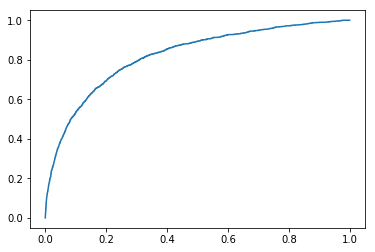

In [133]:
plt.plot(fpr,tpr)

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf = RandomForestClassifier(n_estimators=100)

In [150]:
rf.fit(xtr, ytr)
rf_probs = rf.predict_proba(xts)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(yts, rf_probs[:,1])
auc(rf_fpr, rf_tpr)

0.7986498105691497

#Comparing AUC for logistic regression and random forest 

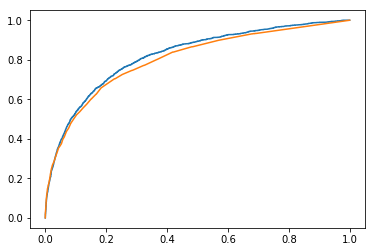

In [137]:
plt.plot(fpr,tpr)
plt.plot(rf_fpr,rf_tpr)

In [138]:
r2 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r2.json")
r2t = r2.T[cls]
print(lr.predict_proba(r2t)[:,1])
print(lr.predict(r2t))

[2.08506588e-07]
[0]


In [139]:
r4 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r4.json")
r4t = r4.T[cls]
print(lr.predict_proba(r4t)[:,1])
print(lr.predict(r4t))

[0.08635249]
[0]


In [140]:
r3 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r3.json")
r3t = r3.T

In [141]:
r3t

,ELIX1,ELIX10,ELIX11,ELIX12,ELIX13,ELIX14,ELIX15,ELIX16,ELIX17,ELIX18,...,drugs_m2-3,drugs_m3-4,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,index,race
0,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,0,3,1,1,9996,O


In [142]:
r3t['ELIX3'] = '1'

In [143]:
r3t.insert(1,'ELIX5','0')

In [144]:
r3t =r3t[cls]

#Logistic regression

In [145]:
print(lr.predict_proba(r3t))

[[0.9855872 0.0144128]]


In [146]:
print(lr.predict(r3t))

[0]


#Random Forest

In [151]:
rf_probs = rf.predict_proba(r3t)

In [152]:
print(rf_probs)

[[1. 0.]]
